In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("headbrain.csv")
print(data)


     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [8]:
data.shape

(237, 4)

In [10]:
x, y = np.array(list(data['Head Size(cm^3)'])), np.array(list(data['Brain Weight(grams)']))
print(x[:5], y[:5])

[4512 3738 4261 3777 4177] [1530 1297 1335 1282 1590]


In [11]:
def get_line(x, y):
    x_m, y_m = np.mean(x), np.mean(y)
    print(x_m, y_m)
    x_d, y_d = x-x_m, y-y_m
    m = np.sum(x_d*y_d)/np.sum(x_d**2)
    c = y_m - (m*x_m)
    print(m, c)
    return lambda x : m*x+c

In [13]:
lin = get_line(x, y)

3633.9915611814345 1282.873417721519
0.2634293394893993 325.5734210494428


In [14]:
lin(34)

334.5300185920824

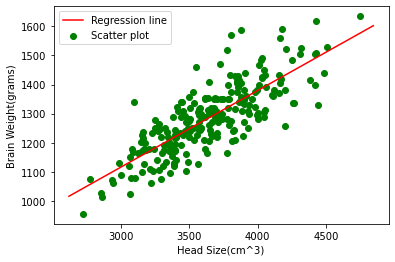

In [15]:
X = np.linspace(np.min(x)-100, np.max(x)+100, 1000)
Y = np.array([lin(x) for x in X])
plt.plot(X, Y, color='red', label='Regression line')
plt.scatter(x, y, color='green', label='Scatter plot')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [16]:
def get_error(lin, x, y):
    y_m = np.mean(y)
    y_pred = np.array([lin(_) for _ in x])
    ss_t = np.sum((y-y_m)**2)
    ss_r = np.sum((y-y_pred)**2)
    return 1-(ss_r/ss_t)

In [17]:
get_error(lin,x, y)

0.639311719957

In [25]:
from sklearn.linear_model import LinearRegression

x  = x.reshape((len(x),1))
reg=LinearRegression()
reg=reg.fit(x, y)
print(reg.score(x, y))

0.639311719957
